# Modelos de Regresión Lineal

## Modelo con datos simulados
* y = a + b * x
* X: 100 valores distribuidos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estará distribuida según una (0, 0.8)

In [8]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [9]:
x = 1.5 + 2.5 * np.random.randn(100)

In [10]:
res = 0 + 0.8 * np.random.randn(100) 

In [11]:
y_pred = 5 + 1.9 * x

In [12]:
y_act = 5 + 1.9 * x + res

In [13]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [14]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_actual": y_act_list,
        "y_prediccion": y_pred_list 
    }
)

In [15]:
data.head()

x   y_actual  y_prediccion
0 -0.272513   5.603614      4.482225
1  4.254591  13.276953     13.083723
2  1.018154   7.944524      6.934492
3  1.482827   7.727020      7.817370
4  5.717261  17.091933     15.862796

In [16]:
import matplotlib.pyplot as plt

In [17]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5,1,'Valor actual vs predicción')

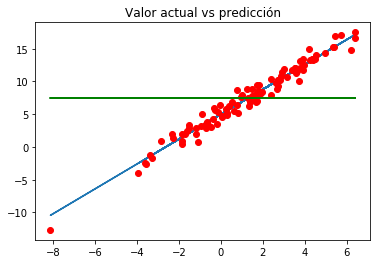

In [18]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor actual vs predicción")

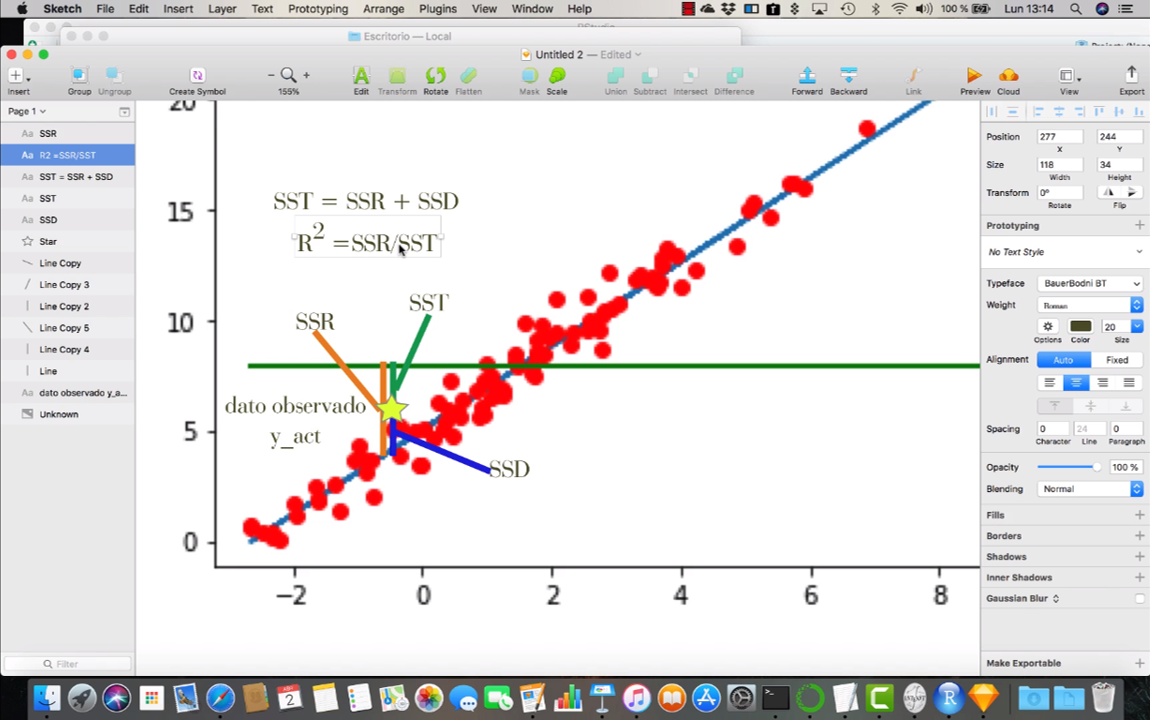

In [19]:
Image(filename='resources/r2.png')

In [20]:
data['SSR'] = (data['y_prediccion'] - np.mean(y_act))**2
data['SSD'] = (data['y_prediccion'] - data['y_actual'])**2
data['SST'] = (data['y_actual'] - np.mean(y_act))**2

In [21]:
data.head()

x   y_actual  y_prediccion        SSR       SSD        SST
0 -0.272513   5.603614      4.482225   8.871809  1.257513   3.449079
1  4.254591  13.276953     13.083723  31.617449  0.037338  33.827835
2  1.018154   7.944524      6.934492   0.276983  1.020165   0.234005
3  1.482827   7.727020      7.817370   0.127155  0.008163   0.070882
4  5.717261  17.091933     15.862796  70.593824  1.510777  92.759049

### ¿Cómo es la predicción de buena?
* SSD + SSR = SSR
* SST: Variabilidad de los datos con respecto de su media
* SSD: Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (erroes que deberían seguir una distribución normal)
* SSR: Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2: SSR / SST, coeficiente de determinación entre 0 y 1

In [22]:
SSR = sum(data['SSR'])
SSD = sum(data['SSD'])
SST = sum(data['SST'])

In [23]:
SSR

2528.963168760091

In [24]:
SSD

86.4983155231816

In [25]:
SST

2725.357553449877

In [26]:
SSR + SSD

2615.4614842832725

In [27]:
R2 = SSR/SST

In [28]:
R2

0.9279381215719085

(array([ 2.,  6., 10.,  9., 21., 20., 18.,  7.,  3.,  4.]),
 array([-2.27307882, -1.82317538, -1.37327194, -0.9233685 , -0.47346506,
        -0.02356162,  0.42634182,  0.87624526,  1.3261487 ,  1.77605214,
         2.22595558]),
 <a list of 10 Patch objects>)

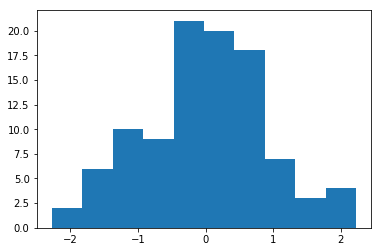

In [29]:
plt.hist(data['y_prediccion'] - data['y_actual'])

### Obteniendo la recta de regresión
* y = a + b * x
* b = sum(xi - x_m) * (y_i - y_m) / sum(x1 - x_m) ^ 2)
* a = y_m - b * x_m

In [30]:
x_mean = np.mean(data['x'])
y_mean = np.mean(data['y_actual'])
x_mean, y_mean

(1.2878175065235278, 7.460783041924616)

In [31]:
data['beta_num'] = (data['x'] - x_mean) * (data['y_actual'] - y_mean)
data['beta_den'] = (data['x'] - x_mean)**2

In [32]:
beta = sum(data['beta_num']) / sum(data['beta_den'])

In [33]:
alpha = y_mean - beta * x_mean

In [34]:
alpha, beta

(4.960746605595151, 1.9412971353979573)

El modelo lineal obtenido por regresión es: 
y = 5.026248805345288 + 1.9027527250023375 * x

In [35]:
data['y_model'] = alpha + beta * data['x']

In [36]:
data.head()

x   y_actual  y_prediccion        SSR       SSD        SST  \
0 -0.272513   5.603614      4.482225   8.871809  1.257513   3.449079   
1  4.254591  13.276953     13.083723  31.617449  0.037338  33.827835   
2  1.018154   7.944524      6.934492   0.276983  1.020165   0.234005   
3  1.482827   7.727020      7.817370   0.127155  0.008163   0.070882   
4  5.717261  17.091933     15.862796  70.593824  1.510777  92.759049   

    beta_num   beta_den    y_model  
0   2.897799   2.434632   4.431717  
1  17.255258   8.801744  13.220172  
2  -0.130448   0.072719   6.937285  
3   0.051919   0.038029   7.839354  
4  42.660636  19.619971  16.059649

In [37]:
SSR = sum((data['y_model'] - y_mean)**2)
SSD = sum((data['y_model'] - data['y_actual'])**2)
SST = sum((data['y_actual'] - y_mean)**2)

In [38]:
SSR, SSD, SST

(2640.0733774595874, 85.28417599028874, 2725.357553449877)

In [39]:
R2 = SSR/SST
R2

0.9687071606871058

Text(0.5,1,'Valor actual vs predicción')

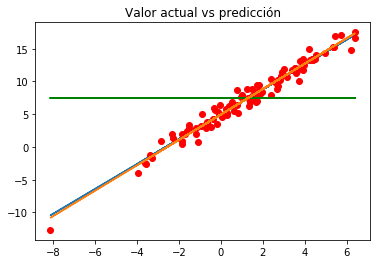

In [40]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.plot(data['x'], data['y_model'])
plt.title("Valor actual vs predicción")

Existen otros estadísticos y parámetros para saber diferentes cosas. Como para seleccionar y descartar variables que existen en el modelo.

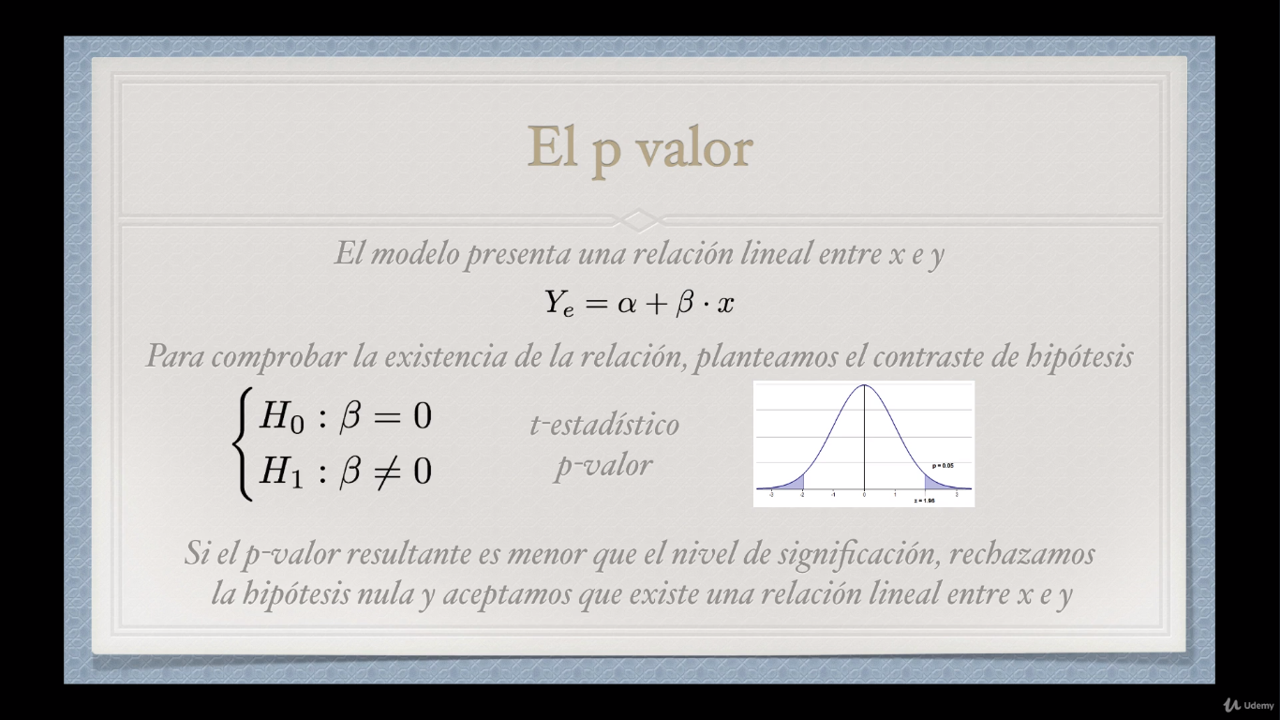

In [41]:
Image(filename='resources/el_p_valor.png')

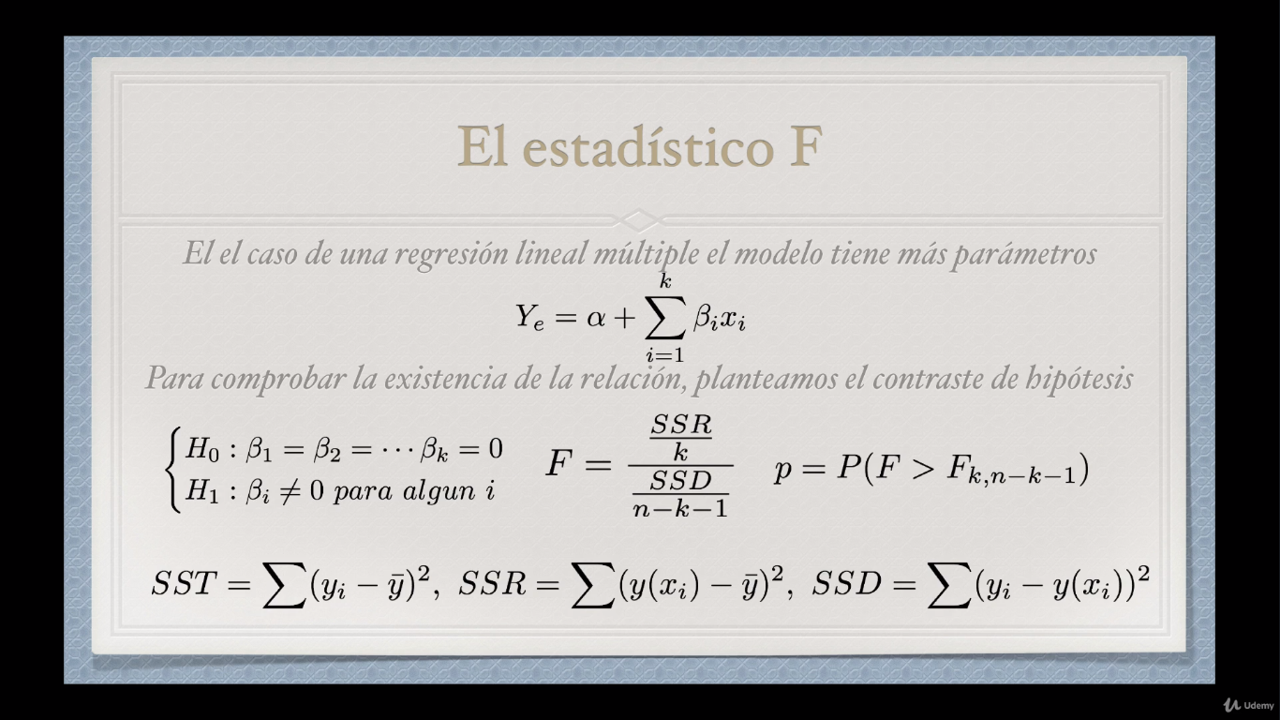

In [42]:
Image(filename='resources/estadistico_f.png')

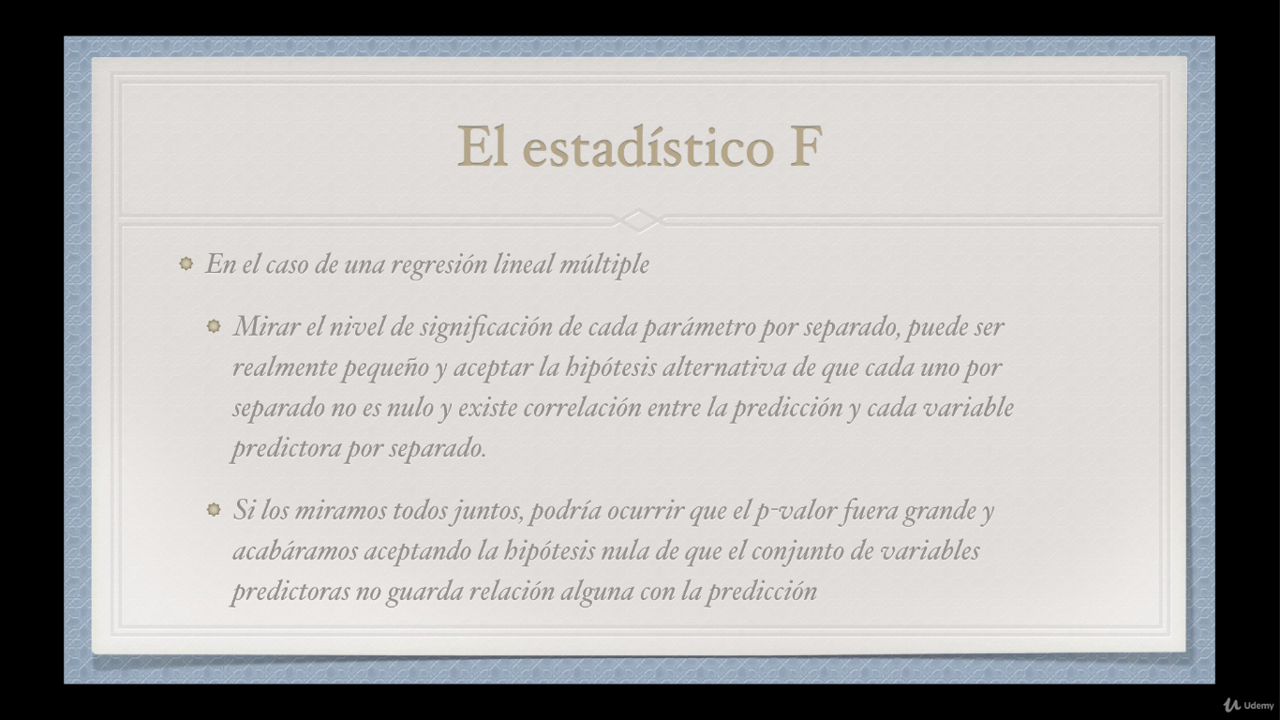

In [43]:
Image(filename='resources/estadistico_f_2.png')

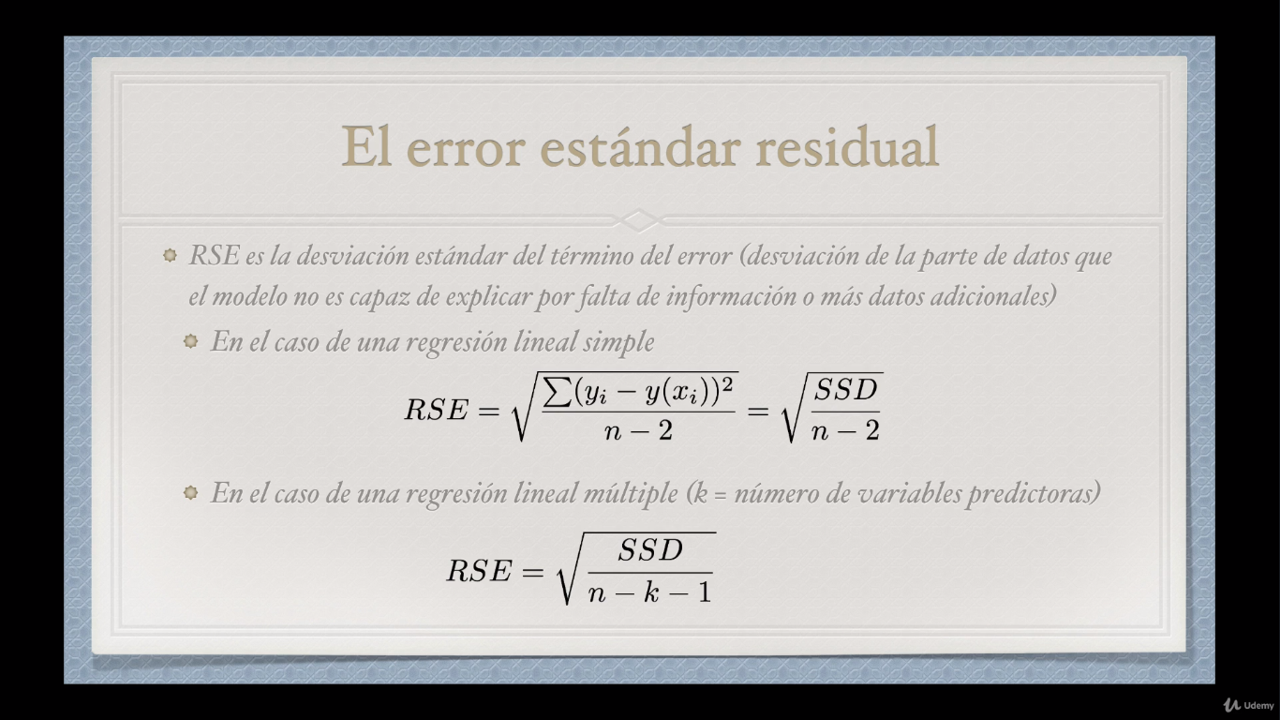

In [44]:
Image(filename='resources/error_estandar_residual.png')

### Error estándar de los residuos (RSE)

In [46]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.9328701376817978

In [47]:
np.mean(data['y_actual'])

7.460783041924616

In [49]:
# Porcentaje de error
RSE / np.mean(data['y_actual'])

0.12503649180517526